# Assignment 2

## Question 1

Prove that the given algorithm generates a $Bern(\frac{c_yp_y}{c_xp_x+c_yp_y})$ event. 
Also, find the probability distribution of the number of iterations it takes to give an output.

1. Draw $C_1\sim Bern(\frac{c_y}{c_y+c_x})$
2. **if** $C_1=1$ **then**
3. &emsp;Draw $C_2\sim Bern(p_y)$
4. &emsp;**if** $C_2=1$ **then**
5. &emsp;&emsp;output 1
6. &emsp;**if** $C_2=0$ **then**
7. &emsp;&emsp;go to Step 1
8. **if** $C_1=0$ **then**
9. &emsp;Draw $C_2\sim Bern(p_x)$
10. &emsp;**if** $C_2=1$ **then**
11. &emsp;&emsp;output 0
12. &emsp;**if** $C_2=0$ **then**
13. &emsp;&emsp;go to Step 1

## Answer:

Probability of getting 1 from our algorithm:
\begin{align*}
P(1)&=P(1|C_1=1)+P(1|C_1=0)\\&=P(C_1=1,C_2=1)+0\\&=\frac{c_y}{c_y+c_x}\cdot p_y\\&=\frac{c_yp_y}{c_x+c_y}
\end{align*}
Probability of getting 0 from our algorithm:
\begin{align*}
P(0)&=P(0|C_1=1)+P(0|C_1=0)\\&=0+P(C_1=0,C_2=1)\\&=(1-\frac{c_y}{c_y+c_x})\cdot p_y\\&=\frac{c_xp_x}{c_x+c_y}
\end{align*}
Probability of getting accepted:
\begin{align*}
P(accepted)&=P(1)+P(0)\\&=\frac{c_yp_y}{c_x+c_y}+\frac{c_xp_x}{c_x+c_y}\\&=\frac{c_xp_x+c_yp_y}{c_x+c_y}
\end{align*}
Probability of getting 1 when accepted:
\begin{align*}
P(1|accepted)&=\frac{P(1\cap accepted)}{P(accepted)}\\&=\frac{\frac{c_yp_y}{c_x+c_y}}{\frac{c_xp_x+c_yp_y}{c_x+c_y}}\\&=\frac{c_yp_y}{c_xp_x+c_yp_y}
\end{align*}
Similarily, Probability of getting 0 when accepted:
\begin{align*}
P(0|accepted)&=\frac{P(0\cap accepted)}{P(accepted)}&\\=\frac{\frac{c_xp_x}{c_x+c_y}}{\frac{c_xp_x+c_yp_y}{c_x+c_y}}&\\=\frac{c_xp_x}{c_xp_x+c_yp_y}
\end{align*}
Thus, we see that the given algorithm generates a $Bern(\frac{c_yp_y}{c_xp_x+c_yp_y})$ event.\
\
Also, it is easy to see that number of iterations required is a geometric random variable with success probability ($p$) equal to $\frac{c_xp_x+c_yp_y}{c_x+c_y}$.\
Thus, it is distributed as,
\begin{equation*}
P(n=k)=(1-p)^{(k-1)}\cdot p
\end{equation*}
where $p=\frac{c_xp_x+c_yp_y}{c_x+c_y}$

## Question 2


Sample uniformly from a p-dimensional sphere (a circle is $p=2$). Consider a $p$-vector $x=(x_1,x_2,\ldots,x_p)$ and let $||.||$ denote the Euclidean norm. The pdf of this distribution is:
\begin{equation*}
f(x)=\frac{\Gamma(\frac{p}{2}+1)}{\pi^{p/2}}I\{||x||\leq1\}
\end{equation*}
Use a uniform $p$-dimensional hypercube to sample uniformly from this sphere. Implement this for $p = 2, 3, 4, 5, \text{and }6.$
What happens as $p$ increases?

Code for the sampler:

In [11]:
using Random
using Plots
function p_hypercube(p)
    # Generating p uniform values between -1 and 1
    return 2*rand(p).-1
end
function p_sphere(p)
    count=0
    while true
        x=p_hypercube(p)
        count+=1
        if x'*x>1
            continue
        end
        # Returning the p-tuple and number of iterations required
        return x,count
    end
end

p_sphere (generic function with 1 method)

Sample plot for n=2:

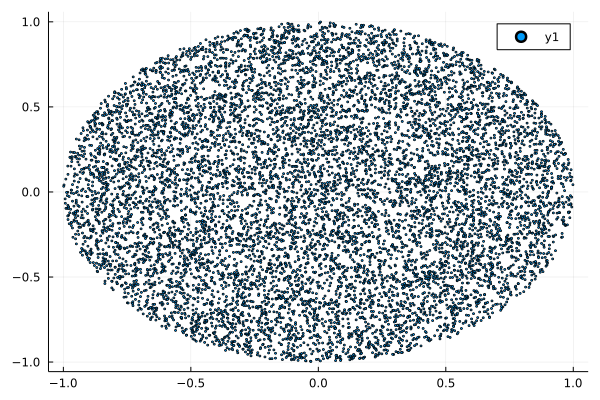

In [13]:
reps=10000
x=zeros(reps)
y=zeros(reps)
for j in 1:reps
    t=p_sphere(2)
    x[j]=t[1][1]
    y[j]=t[1][2]
end
plot(x,y,seriestype=:scatter, markersize=2)

Sample plot for p=3:

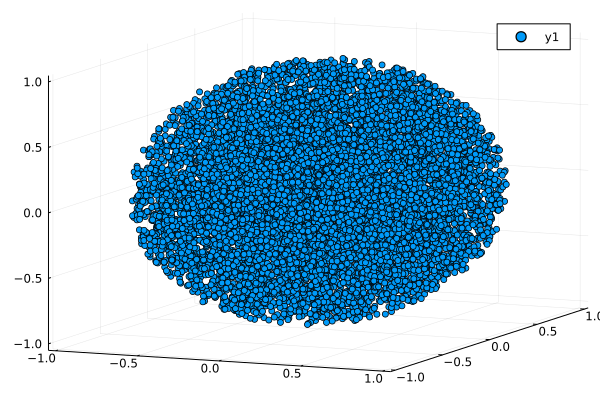

In [16]:
reps=10000
x=zeros(reps)
y=zeros(reps)
z=zeros(reps)
for j in 1:reps
    t=p_sphere(3)
    x[j]=t[1][1]
    y[j]=t[1][2]
    z[j]=t[1][3]
end
plot(scatter(x,y,z),seriestype=:scatter)

Number of iterations vs p:

In [17]:

for i in 2:6
    reps=100000
    temp=0
    for j in 1:reps
        t=p_sphere(i)
        temp+=t[2]
    end
    println("Average iterations for i = ",i," is ", temp/reps)
end

Average iterations for i = 2 is 1.27412
Average iterations for i = 3 is 1.91494
Average iterations for i = 4 is 3.24584
Average iterations for i = 5 is 6.06376
Average iterations for i = 6 is 12.40092


As $p$ increases, the average number of iterations increase.

## Question 3

Using accept-reject and a standard normal proposal, obtain samples from a truncated standard normal distribution with pdf:
$$
f(x)=\frac{1}{\phi(a)-\phi(-a)}\frac{1}{\sqrt{2\pi}}e^{-x^2/2}I(-a<x<a)
$$
where Φ(·) is the CDF of a standard normal distribution. Run for $a=4$ and $a=1$. 
What are the differences between the two settings?


In [51]:
using Random, Distributions
function truncated_normal(a)
    count=0
    while true
        d=Normal()
        x=rand(d)
        count+=1
        if(x>a||x<(-1*a))
            continue
        end
        return x,count
    end
end

truncated_normal (generic function with 1 method)

Plot for $a=4$:

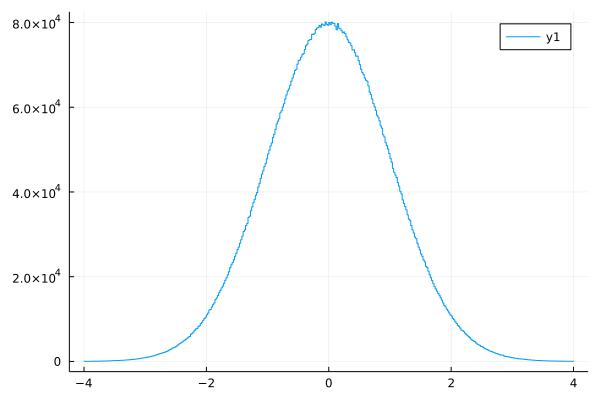

In [52]:
reps=10000000
x=zeros(reps)
for j in 1:reps
    t=truncated_normal(4)
    x[j]=t[1]
end
plot(histogram(x))

Plot for $a=1$:

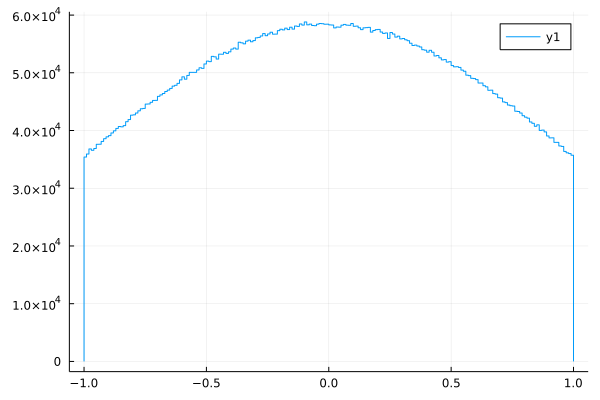

In [53]:
reps=10000000
x=zeros(reps)
for j in 1:reps
    t=truncated_normal(1)
    x[j]=t[1]
end
plot(histogram(x))

For $a=4$ the truncated probability is too little so it we reject rarely. This is different from that for $a=1$